# Importing

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from PIL import Image
import difflib
import re
import math
import json
import sys

import torch

from vietocr.vietocr.tool.predictor import Predictor
from vietocr.vietocr.tool.config import Cfg

from PaddleOCR import PaddleOCR, draw_ocr

# Specifying output path and font path.
out_path = './output'
font = './PaddleOCR/doc/fonts/latin.ttf'
#font= 'PaddleOCR/doc/fonts/font-times-new-roman.ttf'

In [18]:
# #predict detection
# !python3 PaddleOCR/tools/infer/predict_det.py --det_algorithm="DB" --use_gpu=True \
#                                     #--det_model_dir="./inference/SAST"  \
#                                     --image_dir=/Users/bmd1905/Desktop/paddle-vietocr/samples/devan5.jpeg

# Ultilities

In [2]:
# Functions
def paddle_show(img_path, out_path, result, font, dpi=200):
  figure(figsize=(50, 50), dpi=80)
  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')

  image = cv2.imread(img_path)

  result = result[:][:][0]

  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]

  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

  #cv2.imwrite(save_path, im_show)

  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)

  height, width, depth = img.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(img, cmap='gray')

  plt.show()

def display_image_in_actual_size(img_path, dpi=200):
  im_data = cv2.imread(img_path)

  height, width, depth = im_data.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data, cmap='gray')

  plt.show()

# Configuration

In [3]:
# Configure of VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
# config = Cfg.load_config_from_file('vi00_vi01_transformer.yml')
# config['weights'] = '/Users/bmd1905/Desktop/pretrain_ocr/vi00_vi01_transformer.pth'

config['cnn']['pretrained'] = True
config['predictor']['beamsearch'] = True
config['device'] = 'mps' # cuda:0

detector = Predictor(config)

Model weight /var/folders/n0/pm_kd5l512s4twgmm91v77h40000gn/T/vgg_transformer.pth exsits. Ignore download!


In [4]:
# Config of PaddleOCR
Paddle = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=True)

[2023/02/09 16:14:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/bmd1905/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/bmd1905/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

# Only PaddleOCR

[2023/02/09 16:14:42] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/09 16:14:43] ppocr DEBUG: dt_boxes num : 57, elapse : 0.36170506477355957
[2023/02/09 16:14:50] ppocr DEBUG: rec_res num  : 57, elapse : 6.848001003265381


<Figure size 4000x4000 with 0 Axes>

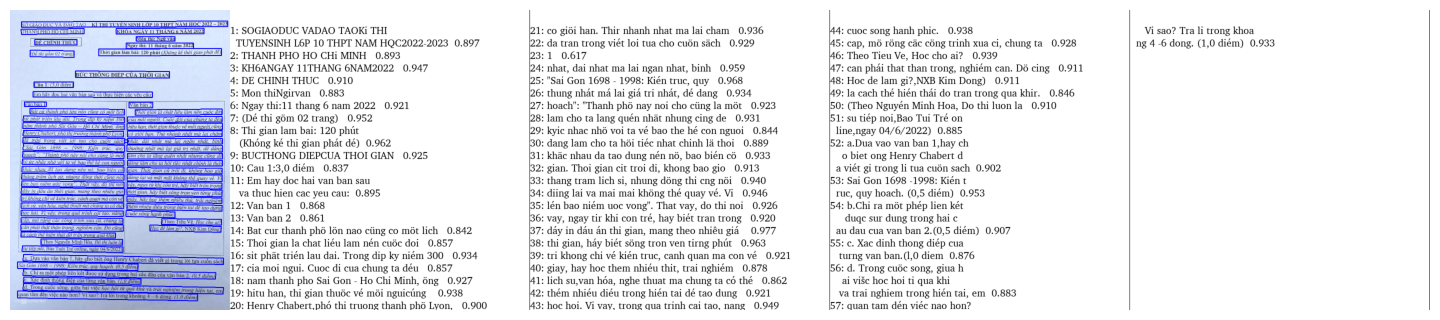

In [5]:
img_path = 'samples/devan6.jpg'
result = Paddle.ocr(img_path)

paddle_show(img_path, out_path, result, font, dpi=200)

In [23]:
# figure(figsize=(50, 50), dpi=80)
# save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')

# image = cv2.imread(img_path)

# result = result[:][:][0]

# boxes = [line[0] for line in result]
# txts = [line[1][0] for line in result]
# scores = [line[1][1] for line in result]

# im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

# #cv2.imwrite(save_path, im_show)

# img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)

# height, width, depth = img.shape

# # What size does the figure need to be in inches to fit the image?
# figsize = width / float(dpi), height / float(dpi)

# # Create a figure of the right size with one axes that takes up the full figure
# fig = plt.figure(figsize=figsize)
# ax = fig.add_axes([0, 0, 1, 1])

# # Hide spines, ticks, etc.
# ax.axis('off')

# # Display the image.
# ax.imshow(img, cmap='gray')

# plt.show()

# Only VietOCR

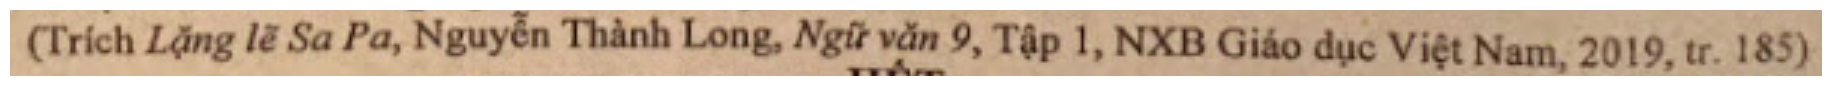

'(Trích Lặng lẽ Sa Pa, Nguyễn Thành Long, Ngữ văn 9, Tập 1, NXB Giáo dục Việt Nam, 2019, tr.185)'

In [6]:
img_path = 'samples/devan4.png'

img = cv2.imread(img_path)
img = Image.fromarray(img)
rec_result = detector.predict(img)

display_image_in_actual_size(img_path, dpi=100)

rec_result

# Paddle + VietOCR

In [7]:
def predict(img_path, padding=4):
  # Load image
  img = cv2.imread(img_path)

  # Text detection
  result = Paddle.ocr(img_path, cls=False, det=True, rec=False)
  result = result[:][:][0]

  # Filter Boxes
  boxes = []
  for line in result:
    boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])
  boxes = boxes[::-1]

  # Add padding to boxes
  EXPpaddingEND = 4
  for box in boxes:
    box[0][0] = box[0][0] - padding
    box[0][1] = box[0][1] - padding
    box[1][0] = box[1][0] + padding
    box[1][1] = box[1][1] + padding

  # Text recognizion
  texts = []
  for box in boxes:
    cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    try:
      cropped_image = Image.fromarray(cropped_image)
    except:
      continue

    rec_result = detector.predict(cropped_image)
    text = rec_result#[0]

    texts.append(text)
    print(text)

  # Show image, for checking
  display_image_in_actual_size(img_path, dpi=100)

  return boxes, texts

QUÊ HƯƠNG
Quê hương là chùm khế ngọt
Cho con trèo hái mỗi ngày
Quê hương là đường đi học
Con về rợp bướm vàng bay
Quê hương Là Cánh Diều Biếc
Tuổi thơ con thà trên đồng
Quê hương là con đò nhỏ
Êm đềm khua nước ven sông
Quê hương là cầu tre nhỏ
Mẹ về nón lá nghiêng che
Quê hương là đêm trăng tỏ
Hoa cau rụng trắng ngoài thềm
Quê hương môi người chỉ một
Như là chỉ một mẹ thôi
Quê hương nếu ai không nhớ
Sẽ không lớn nổi thành người


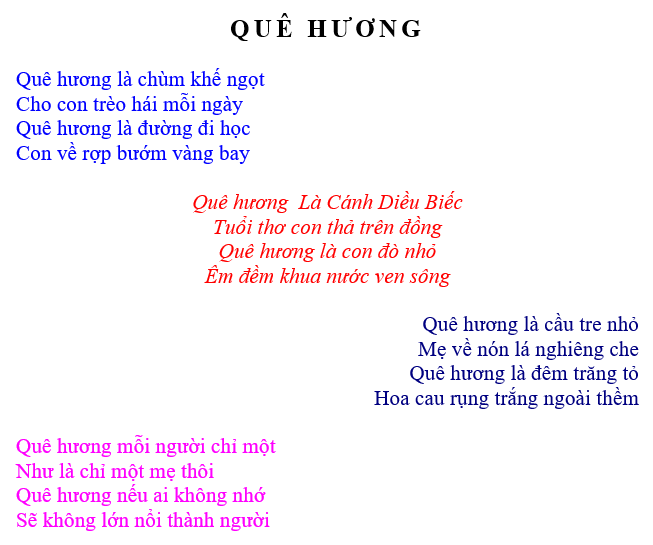

In [8]:
img_path = 'samples/doanvan2.png'

boxes, texts = predict(img_path, padding=2)

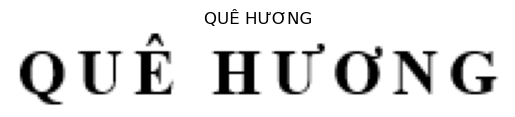

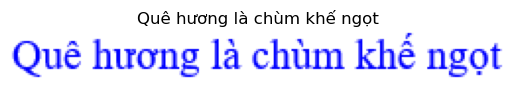

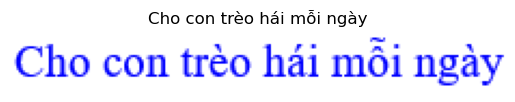

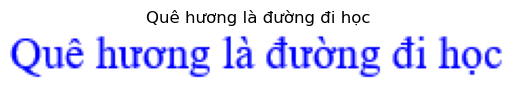

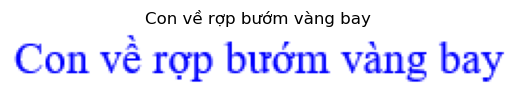

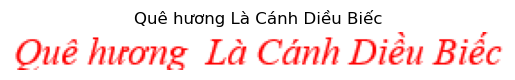

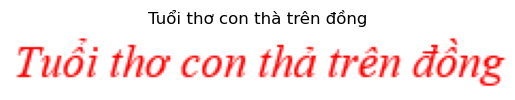

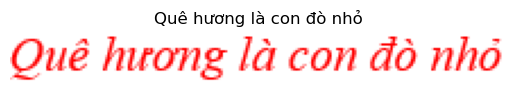

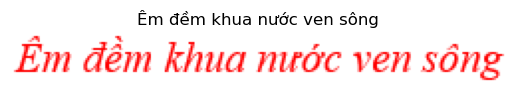

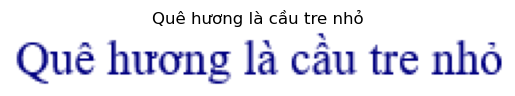

In [9]:
def process(image, text):
  plt.figure()
  plt.axis('off')
  plt.imshow(image)
  plt.title(text)
  

img = cv2.imread(img_path) 
count = 0
for text, box in zip(texts, boxes):
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
  try:
    # process(cropped_image, text)
    # cropped_image = rotate_img(cropped_image)
    process(cropped_image, text)
  except:
    pass
  count += 1
  if count == 10:
    break

# OCR Error Correction

In [10]:
from VietnameseOcrCorrection.tool.predictor import Predictor
import time
from VietnameseOcrCorrection.tool.utils import extract_phrases

model_predictor = Predictor(device='cpu', model_type='seq2seq', weight_path='VietnameseOcrCorrection/weights/seq2seq_0.pth')

ModuleNotFoundError: No module named 'model'

In [ ]:
output = ""

for text in texts:
    output += text
    output += " "
#print(output)
lst_outputs = extract_phrases(output)

In [ ]:

corrected_output = model_predictor.predict(output.strip(), NGRAM=6)
print(output)
print("====================================================")
print(corrected_output)

QUÊ HƯƠNG Quê hương là chùm khế ngọt Cho con trèo hái mỗi ngày Quê hương là đường đi học Con về rợp bướm vàng bay Quê hương Là Cánh Diều Biếc Tuổi thơ con thà trên đồng Quê hương là con đò nhỏ Êm đềm khua nước ven sông Quê hương là cầu tre nhỏ Mẹ về nón lá nghiêng che Quê hương là đêm trăng tỏ Hoa cau rụng trắng ngoài thềm Quê hương môi người chỉ một Như là chỉ một mẹ thôi Quê hương nếu ai không nhớ Sẽ không lớn nổi thành người 
QUÊ HƯƠNG Quê hương là chùm khế ngọt Cho con trèo hái mỗi ngày Quê hương là đường đi học Con về rợp bướm vàng bay Quê hương Là Cánh Diều Biếc Tuổi thơ con thà trên đồng Quê hương là con đò nhỏ Em đềm khua nước ven sông Quê hương là cầu trẻ nhỏ Mẹ về nón lá nghiêng chế Quê hương là đêm trăng tỏ Hoa cau rụng trắng ngoài thềm Quê hương môi người chỉ một Như là chỉ một mẹ thôi Quê hương nếu ai không nhớ Sẽ không lớn nổi thành người
